<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/%D0%94%D0%97.1/BarbashinAndreyTFe1_11_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   ФИО Барбашин Андрей Алексеевич
*   Группа ТФэ-01-20
*   Тлеграмм @QwertyAlexx

Задача 1
Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара: P0 = 5, 10, 15, 20 MPa. Для каждого значения взять следующие значения температуры t0 = 300, 350, 400, 450, 500 градусов Цельсия, Pk = 5 kPa. Принять давление за последней ступенью паровой турбины P2 = Pk. Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ответ на задачу 1.1 =  {573.15: [37.050497725026574, 29.618123112036514, 29.8555757014972, 30.10623495498302], 623.15: [37.62360958747929, 39.92464144485074, 40.510385845552, 34.0018742566356], 673.15: [38.25260083190457, 40.67223823169738, 41.70837545722558, 42.01545604058662], 723.15: [38.930156183806574, 41.393094026307395, 42.57608419957084, 43.188245020181604], 773.15: [39.64787856853082, 42.11798995415142, 43.370325700117775, 44.10561365352634]}


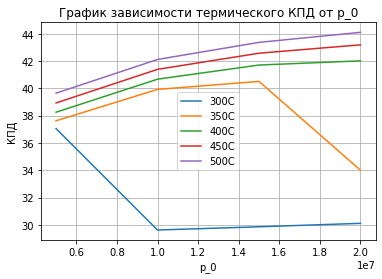

In [24]:
!pip install iapws
import matplotlib.pyplot as plt
import numpy as np
import iapws
from iapws import IAPWS97 as gas
from typing import Optional, Tuple, List, Union

point_type = iapws.iapws97.IAPWS97
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None


def multiply(x):
    return x * 10**3
def multiply1(x):
    return x * 10**6
p_0 = [5,10,15,20]
p_0 = list(map(multiply1,p_0))
p_k = 5 * kPa

t = [300,350,400,450,500]
t_0 = list(map(to_kelvin,t))

def check_is_valid_numerical(values: List[Union[None, float]]) -> None:

    for value in values:
        if value:
            if not isinstance(value, (int, float)):
                raise ValueError(f"Argument should be int or float value! Given {type(value)}")

def construct_cycle_points(
    p_0: Union[int, float],
    p_k: Union[int, float],
    t_0: Optional[Union[int, float]] = None,
    x_0: Optional[Union[int, float]] = None, 
) -> Tuple[point_type, point_type, point_type]:

    check_is_valid_numerical([p_0, p_k, t_0, x_0])
    if not t_0 and not x_0:
        raise ValueError("Neither t_0 not x_0 is not provided for start expansion point!")
    if not (p_0 and p_k):
        raise ValueError("P_0 and p_k must be specified!")
    if x_0 and (x_0 > 1 or x_0 < 0):
        raise ValueError("x_0 should be between 0 and 1")
        
    if t_0:
        point_0 = gas(P=p_0, T=t_0)
    else:
        point_0 = gas(P=p_0, x=x_0)
    
    p_condenser = gas(P=p_k, s=point_0.s)
    p_pump = gas(P=p_k, x=0)
    
    return point_0, p_condenser, p_pump


def compute_cycle_efficiency(p_0: point_type, p_condenser: point_type, p_pump: point_type) -> float:
 
    useful_energy = p_0.h - p_condenser.h
    full_energy = p_0.h - p_pump.h
    efficiency = useful_energy / full_energy * 100
    return efficiency

def solve_exercise(
    p_0: Union[int, float],
    p_k: Union[int, float],
    t_0: Optional[Union[int, float]] = None,
    x_0: Optional[Union[int, float]] = None,) -> float:
  
    point_0, p_condenser, p_pump = construct_cycle_points(
        p_0=p_0 * unit,
        p_k=p_k * unit,
        t_0=t_0,
        x_0=x_0
    )

    efficiency = compute_cycle_efficiency(p_0=point_0, p_condenser=p_condenser, p_pump=p_pump)
    
    return efficiency
# Начальные параметры:


eff = dict()
for t0value in t_0:
    eff[t0value]= []
    for p0value in p_0:
        eff[t0value].append(solve_exercise(p0value,p_k,t0value))
print('Ответ на задачу 1.1 = ', eff)

X = p_0
Y = eff[573.15]
Y1 = eff[623.15]
Y2 = eff[673.15]
Y3 = eff[723.15]
Y4 = eff[773.15]

plt.plot(X,Y)
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.plot(X,Y3)
plt.plot(X,Y4)
plt.grid(True)
plt.title('График зависимости термического КПД от p_0')
plt.ylabel('КПД')
plt.xlabel('p_0')
plt.legend(['300С','350С','400С','450С','500C'])
plt.show()


Задача 2 Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара: P0 = 5 MPa, t0 = 450 градусов Цельсия, Pk = 5, 10, 15, 20, 50 kPa. Принять давление за последней ступенью паровой турбины P2 = Pk. Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ответ на задачу 1.2: [43.13716841557481, 41.34900158661684, 40.22403231473411, 39.38654676617682, 36.47072568125424]


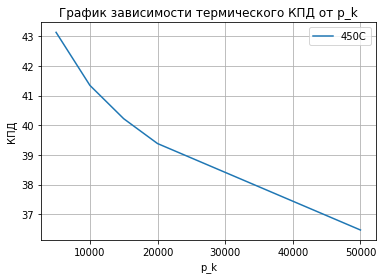

In [7]:
!pip install iapws
import matplotlib.pyplot as plt
import numpy as np
import iapws
from iapws import IAPWS97 as gas
from typing import Optional, Tuple, List, Union
import pandas as pd
point_type = iapws.iapws97.IAPWS97
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

def check_is_valid_numerical(values: List[Union[None, float]]) -> None:

    for value in values:
        if value:
            if not isinstance(value, (int, float)):
                raise ValueError(f"Argument should be int or float value! Given {type(value)}")


def construct_cycle_points(
    p_0: Union[int, float],
    p_k: Union[int, float],
    t_0: Optional[Union[int, float]] = None,
    x_0: Optional[Union[int, float]] = None, 
) -> Tuple[point_type, point_type, point_type]:

    check_is_valid_numerical([p_0, p_k, t_0, x_0])
    if not t_0 and not x_0:
        raise ValueError("Neither t_0 not x_0 is not provided for start expansion point!")
    if not (p_0 and p_k):
        raise ValueError("P_0 and p_k must be specified!")
    if x_0 and (x_0 > 1 or x_0 < 0):
        raise ValueError("x_0 should be between 0 and 1")
        
    if t_0:
        point_0 = gas(P=p_0, T=t_0)
    else:
        point_0 = gas(P=p_0, x=x_0)
    
    p_condenser = gas(P=p_k, s=point_0.s)
    p_pump = gas(P=p_k, x=0)
    
    return point_0, p_condenser, p_pump


def compute_cycle_efficiency(p_0: point_type, p_condenser: point_type, p_pump: point_type) -> float:
 
    useful_energy = p_0.h - p_condenser.h
    full_energy = p_0.h - p_pump.h
    efficiency = useful_energy / full_energy *100
    return efficiency


def solve_exercise(
    p_0: Union[int, float],
    p_k: Union[int, float],
    t_0: Optional[Union[int, float]] = None,
    x_0: Optional[Union[int, float]] = None,) -> float:
  
    point_0, p_condenser, p_pump = construct_cycle_points(
        p_0=p_0 * unit,
        p_k=p_k * unit,
        t_0=to_kelvin(t_0),
        x_0=x_0
    )

    efficiency = compute_cycle_efficiency(p_0=point_0, p_condenser=p_condenser, p_pump=p_pump)
    
    return efficiency
# Начальные параметры:
def temp(x):
    return to_kelvin(x)
def multiply(x):
    return x * 10**3
def multiply1(x):
    return x * 10**6

kPa = [5,10,15,20,50]
MPa = [5,5,5,5,5]
t = [450,450,450,450,450]

p_k0 = list(map(multiply,kPa))
p_0 = list(map(multiply1,MPa))
t_0 = list(map(temp,t))

efficiency5Mpa = list(map(solve_exercise, p_0, p_k0, t_0))

print("Ответ на задачу 1.2:", efficiency5Mpa)

X = np.array(p_k0)
Y = np.array(efficiency5Mpa)

plt.plot(X,Y)
plt.grid(True)
plt.title('График зависимости термического КПД от p_k')
plt.ylabel('КПД')
plt.xlabel('p_k')
plt.legend(['450С'])
plt.show()